# Extension: Quality of the predicted distances in higher dimensions with stage 1 copies

In this notebook, we show results corresponding to the Two-stage Distance Copying Extension, described in Appendix D of the thesis report. Specifically, we consider the stage 1 models trained during the extension experiment on the UCI high-dimensional datasets and measure the errors of the distances they predict for the points of both real and synthetic test datasets, comparing these predictions to ground truth values generated with Algorithm 1. Results are shown for every black box - copy (SNN, MNN, and LNN, appearing in this order for each black box) combination and summarized through averaged tables and scatter plots that describe the relationship between the real and predicted distances.

As a remark, this particular notebook and its plots correspond to the execution with seed 42. Nevertheless, the computations shown in the tables have been averaged across five different seeds (41, 42, 43, 44, and 45), aiming to increase the reliability and significance of the obtained results.

In [1]:
# All necessary imports
import numpy as np
import os
import types
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from time import perf_counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.colors as mcolors
import pickle
import random
from tensorflow.keras.models import save_model, load_model
from tensorflow.keras import Model as KerasModel
from scipy.interpolate import interp1d
from ucimlrepo import fetch_ucirepo
from scipy.stats import qmc
from sklearn.metrics import mean_absolute_error, mean_squared_error

original_cwd = os.getcwd()
os.chdir('../utils')
from utils import *
os.chdir(original_cwd)

In [2]:
# Set the seed
seed = 42
random.seed(seed)
np.random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
tf.random.set_seed(seed)
tf.keras.utils.set_random_seed(seed)
tf.config.experimental.enable_op_determinism()

# Create a wrapper for our Neural network black boxes
def bbmodelW(x):
    if isinstance(bbmodel, tf.keras.models.Model):
        return np.where(bbmodel(x) > 0.5, 1, -1).flatten()
    return np.where(bbmodel.predict(x) > 0.5, 1, -1).flatten()

## Breast cancer dataset

In [3]:
# Import dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
X = breast_cancer_wisconsin_diagnostic.data.features.values
X = normalize(X)
y = np.where(breast_cancer_wisconsin_diagnostic.data.targets.values.flatten() == 'M', 1.,0.)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

X_test = X_test[:200]
Syn_test = np.random.uniform(-1,1, (100, 30))

### Black box 1: Random Forest classifier


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.2200 ± 0.0201
Mean RMSE: 0.2927 ± 0.0285


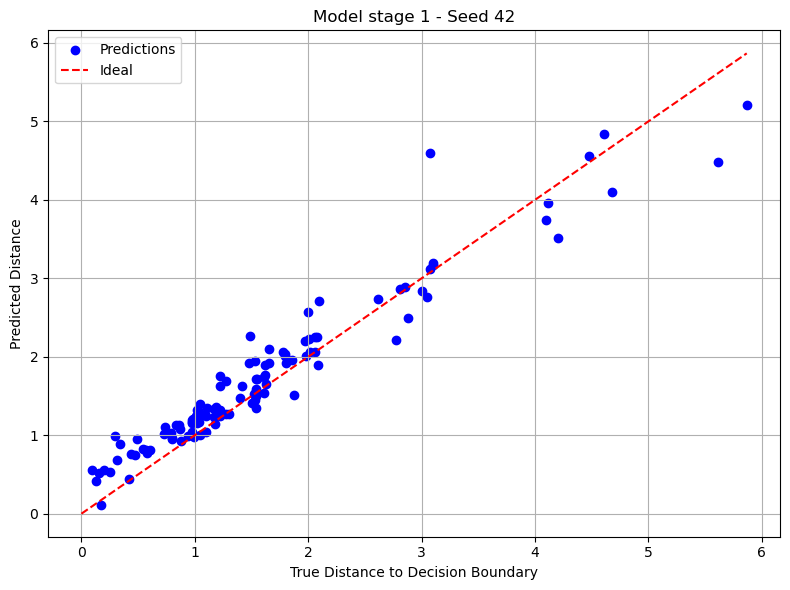

In [4]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_1_1_seed", synthetic_data=X_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.2987 ± 0.0302
Mean RMSE: 0.3710 ± 0.0226


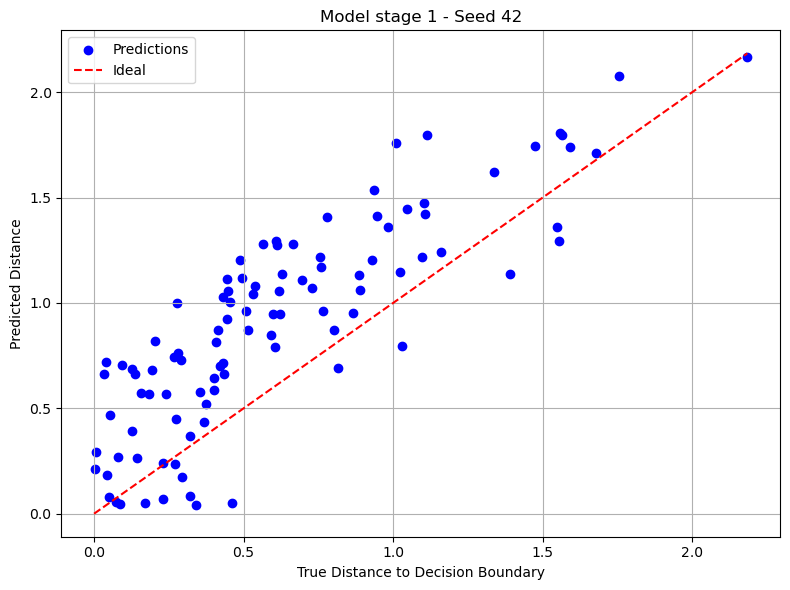

In [5]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_1_1_seed", synthetic_data=Syn_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.2229 ± 0.0277
Mean RMSE: 0.2870 ± 0.0478


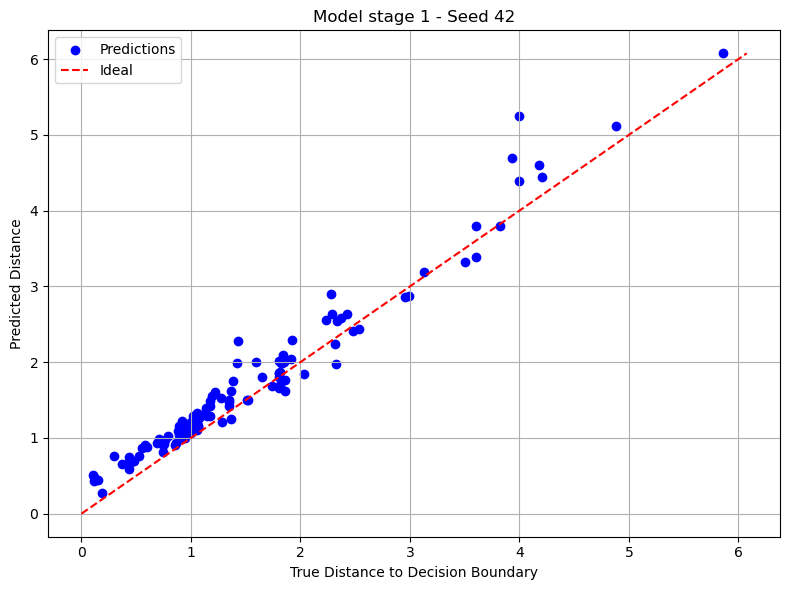

In [6]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_1_2_seed", synthetic_data=X_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.3124 ± 0.0400
Mean RMSE: 0.3718 ± 0.0365


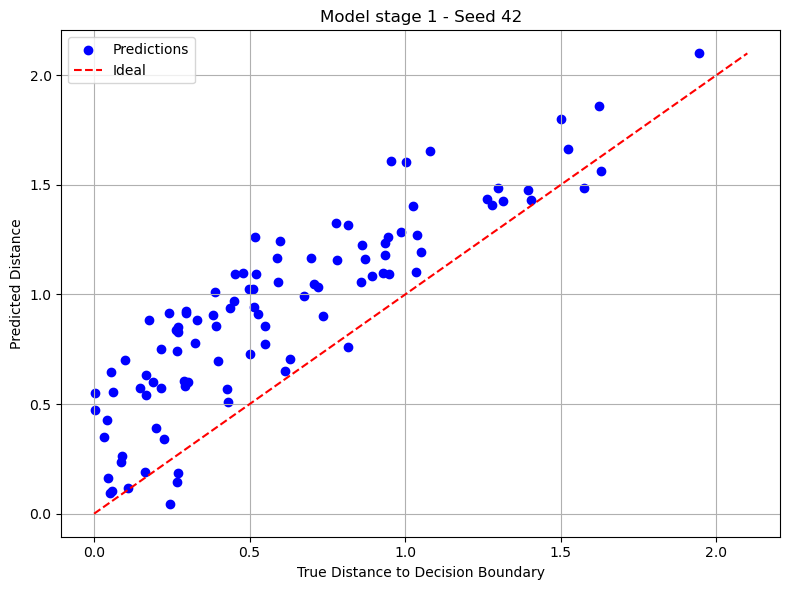

In [7]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_1_2_seed", synthetic_data=Syn_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.2703 ± 0.0507
Mean RMSE: 0.3374 ± 0.0499


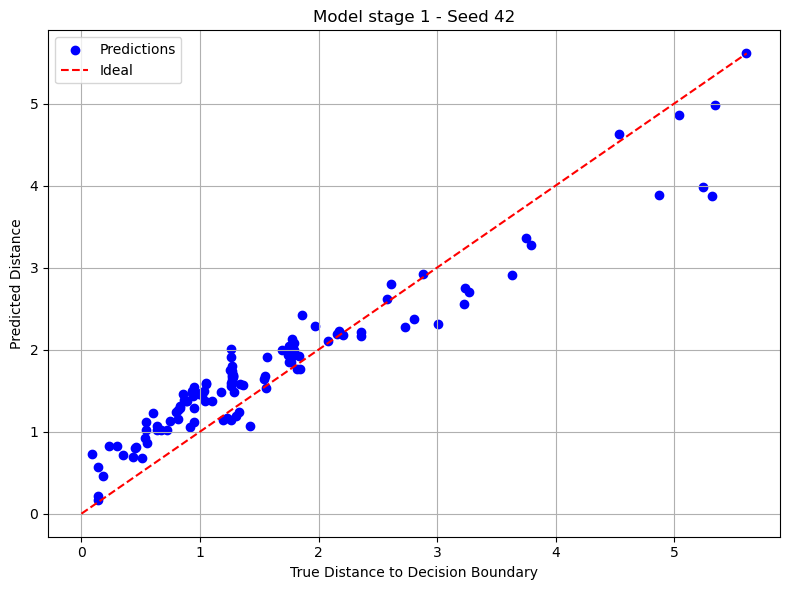

In [8]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_1_3_seed", synthetic_data=X_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.3043 ± 0.0415
Mean RMSE: 0.3607 ± 0.0383


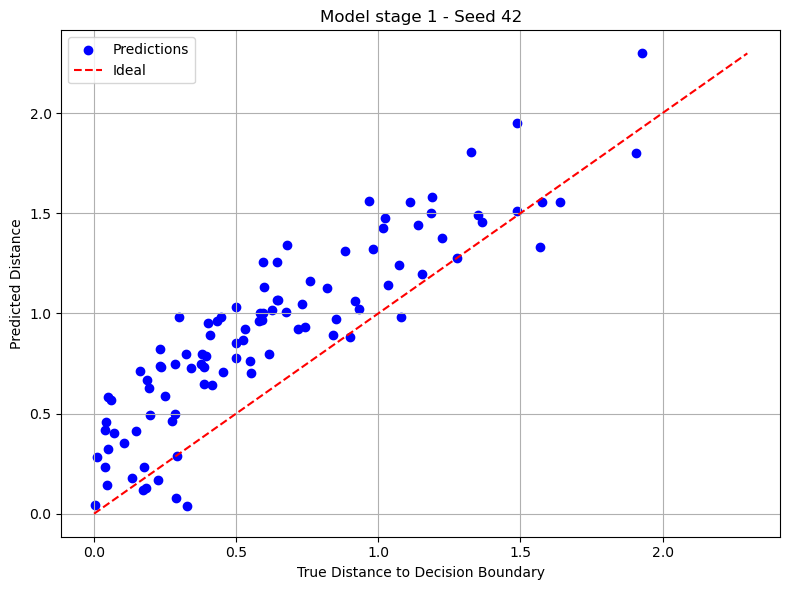

In [9]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_1_3_seed", synthetic_data=Syn_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)

### Black box 2: Gradient Boosting classifier


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.2586 ± 0.0388
Mean RMSE: 0.3090 ± 0.0366


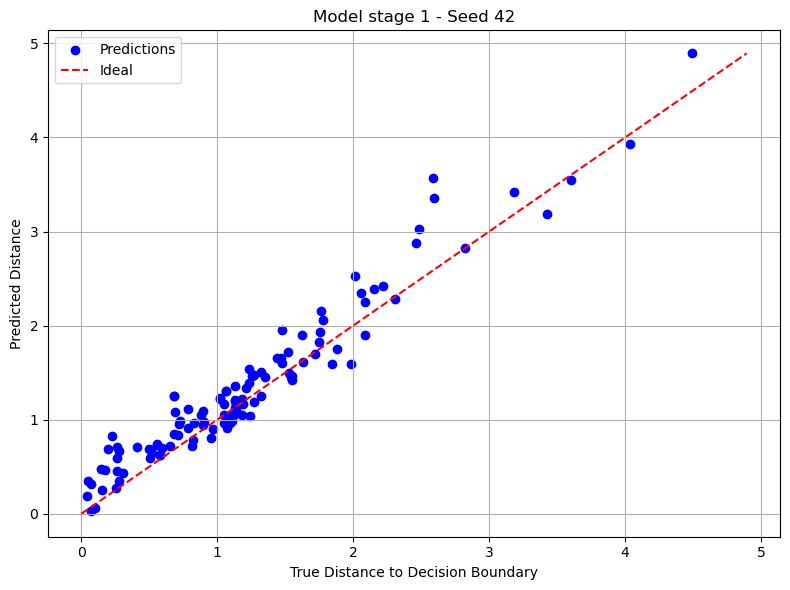

In [10]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_2_1_seed", synthetic_data=X_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.2834 ± 0.0304
Mean RMSE: 0.3485 ± 0.0309


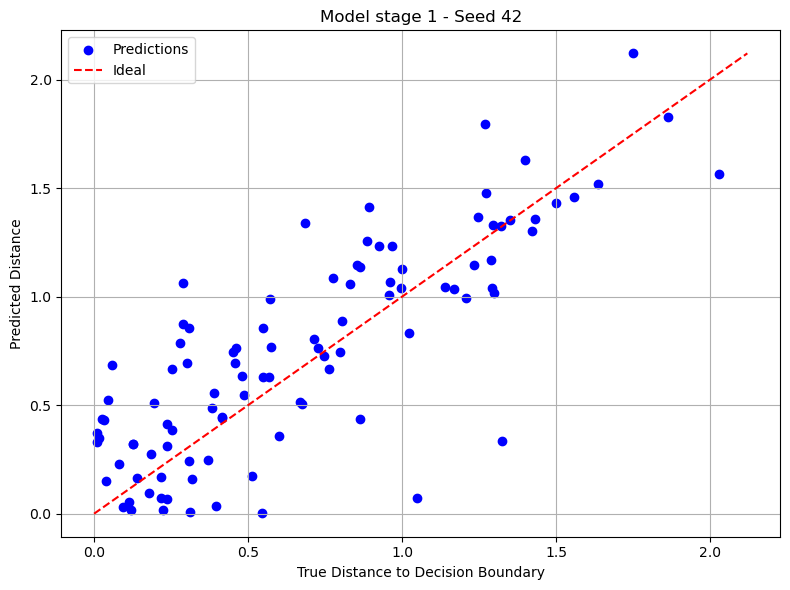

In [11]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_2_1_seed", synthetic_data=Syn_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.2287 ± 0.0570
Mean RMSE: 0.2800 ± 0.0627


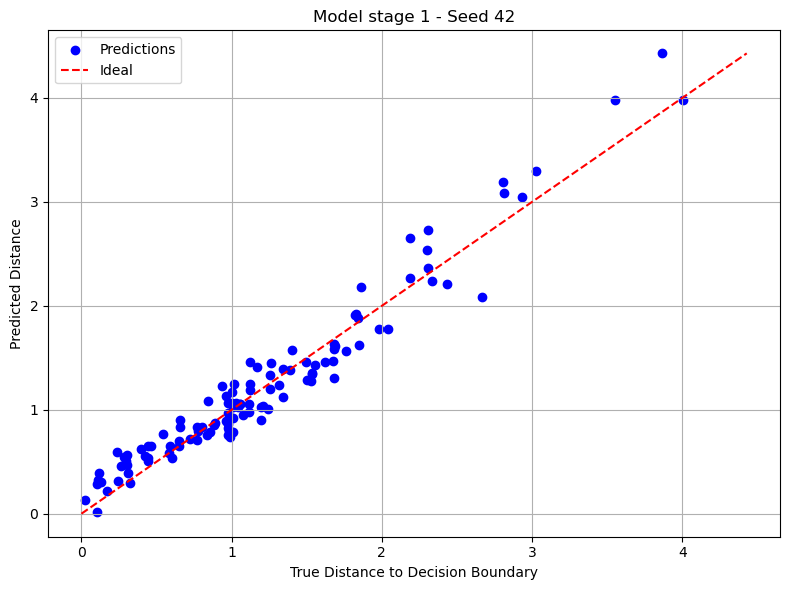

In [12]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_2_2_seed", synthetic_data=X_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.3196 ± 0.0416
Mean RMSE: 0.3790 ± 0.0408


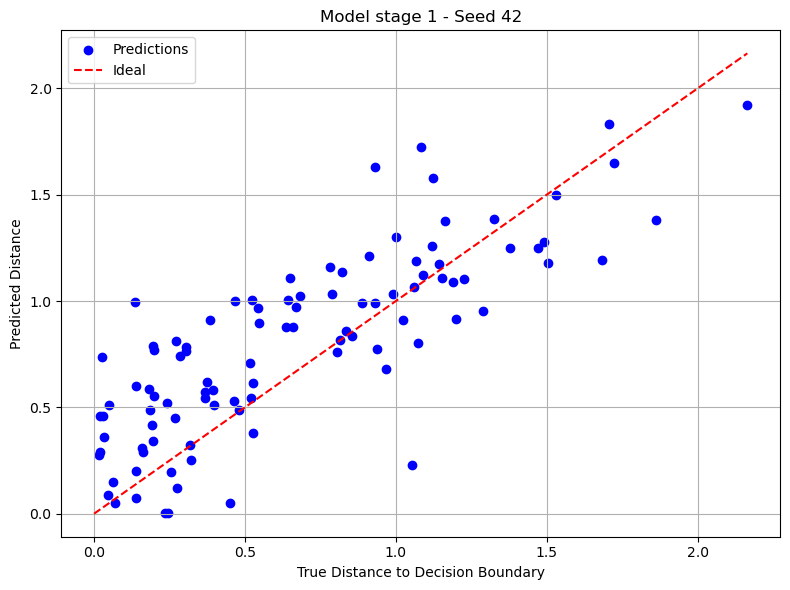

In [13]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_2_2_seed", synthetic_data=Syn_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.2360 ± 0.0317
Mean RMSE: 0.3005 ± 0.0321


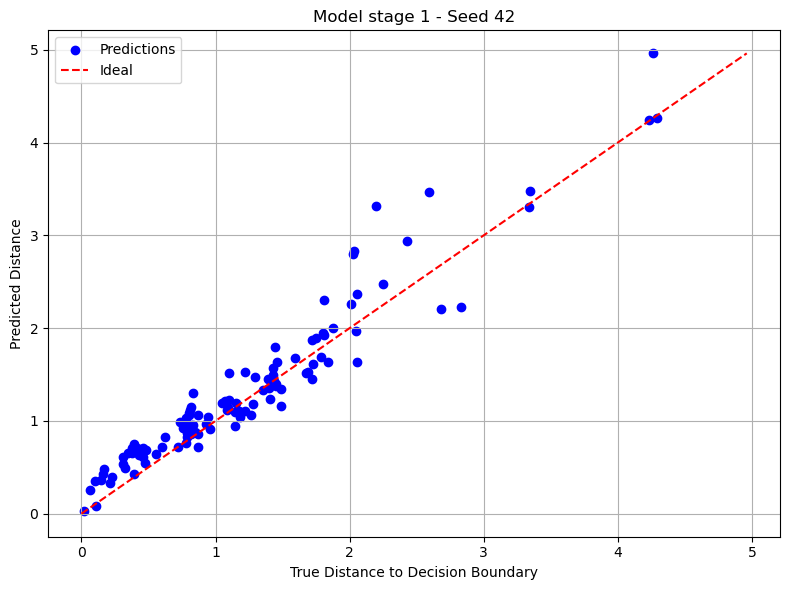

In [14]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_2_3_seed", synthetic_data=X_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.3154 ± 0.0198
Mean RMSE: 0.3704 ± 0.0160


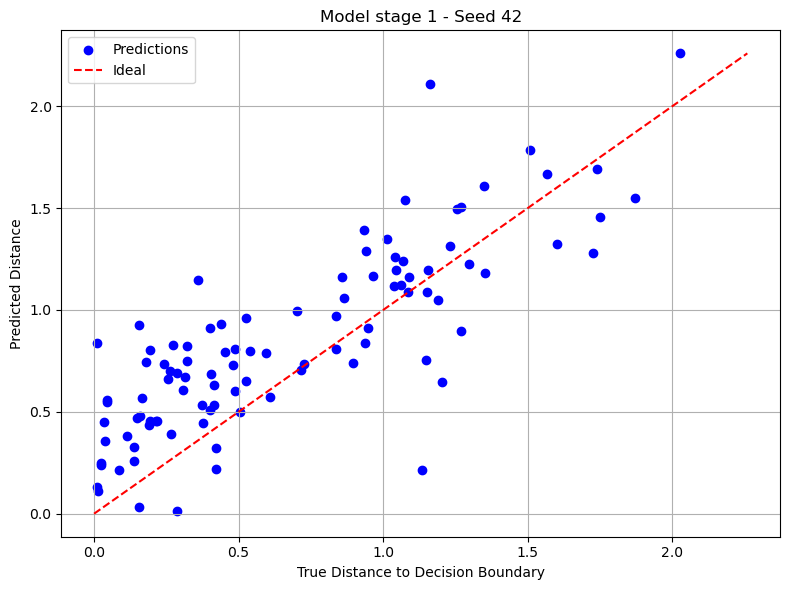

In [15]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_2_3_seed", synthetic_data=Syn_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)

### Black box 3: Neural Network classifier


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.2589 ± 0.0339
Mean RMSE: 0.3252 ± 0.0698


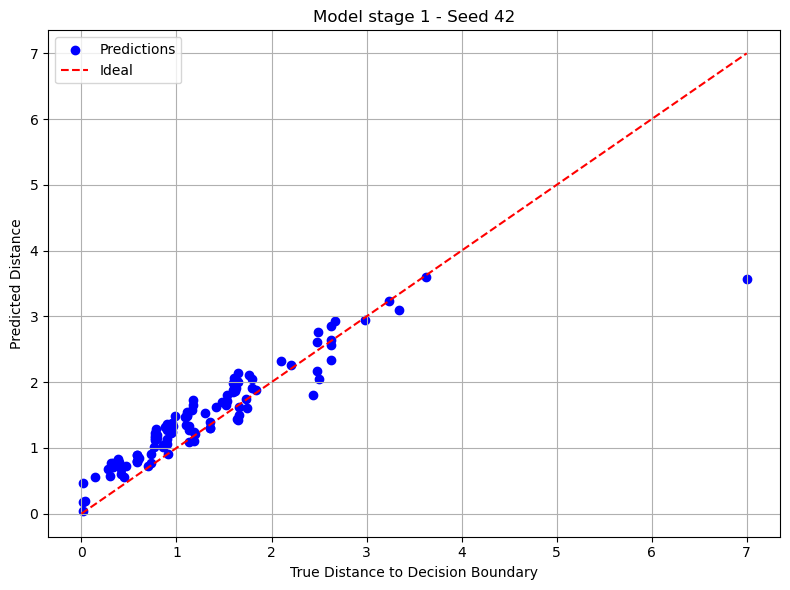

In [16]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_3_1_seed", synthetic_data=X_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.2937 ± 0.0530
Mean RMSE: 0.3855 ± 0.1034


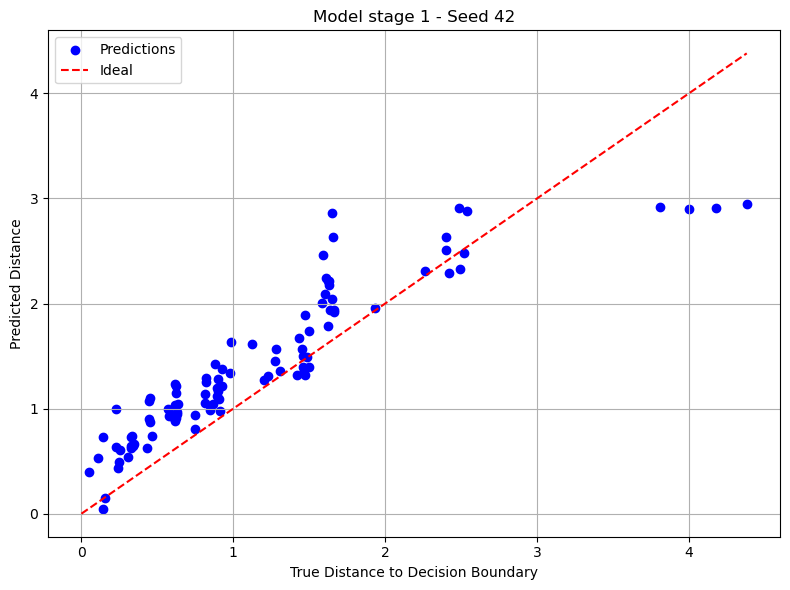

In [17]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_3_1_seed", synthetic_data=Syn_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.2216 ± 0.0183
Mean RMSE: 0.2567 ± 0.0179


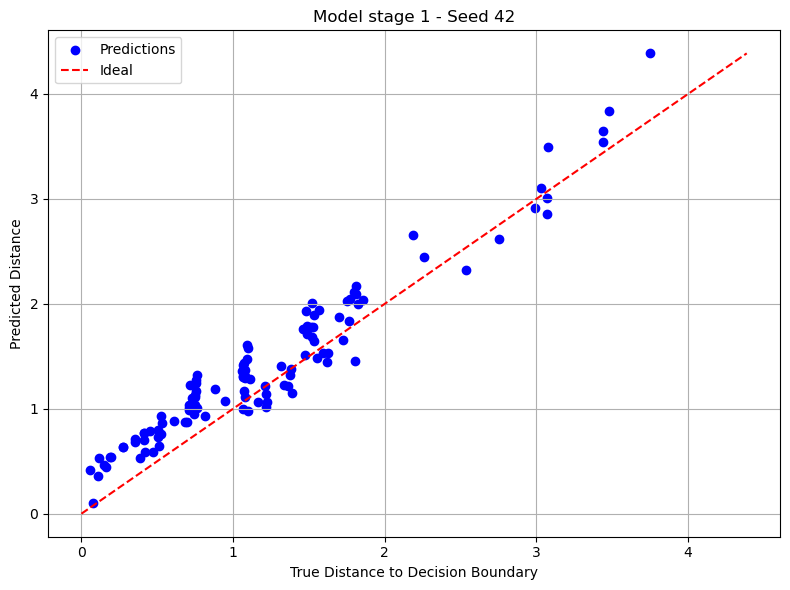

In [18]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_3_2_seed", synthetic_data=X_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.2694 ± 0.0239
Mean RMSE: 0.3677 ± 0.0586


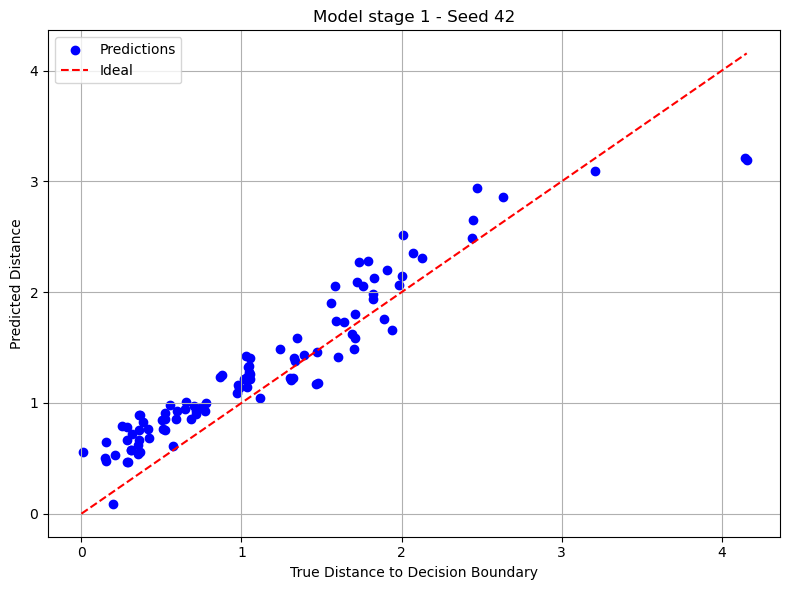

In [19]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_3_2_seed", synthetic_data=Syn_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.2513 ± 0.0320
Mean RMSE: 0.3035 ± 0.0390


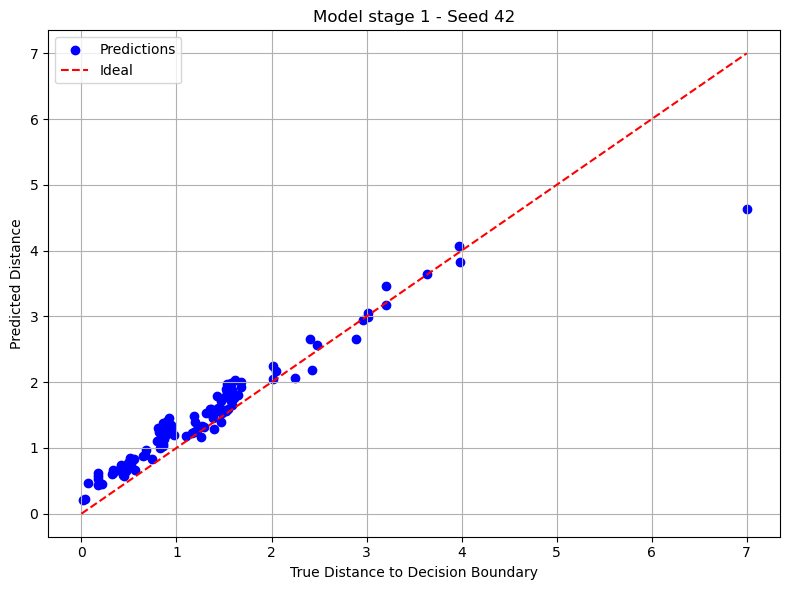

In [20]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_3_3_seed", synthetic_data=X_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.2826 ± 0.0152
Mean RMSE: 0.3835 ± 0.0583


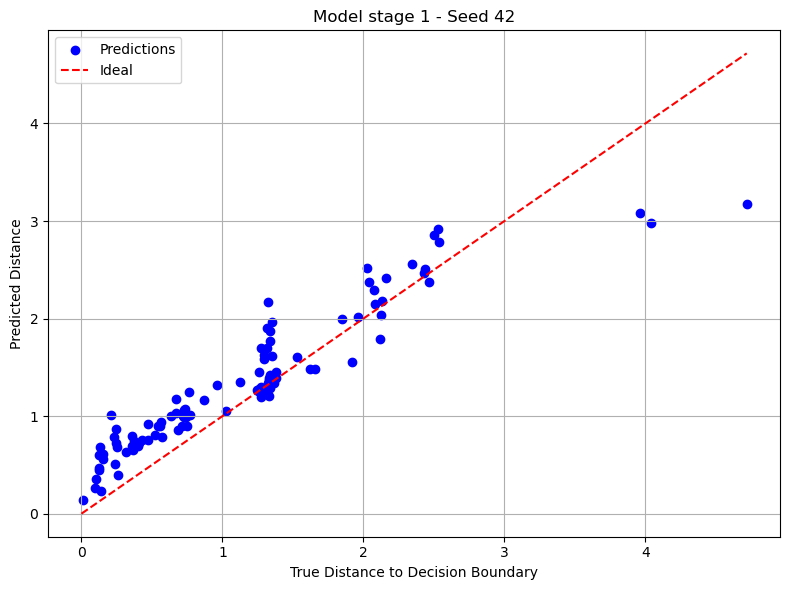

In [21]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_3_3_seed", synthetic_data=Syn_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)

## Rice dataset

In [22]:
# Import dataset
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 
  
X = rice_cammeo_and_osmancik.data.features.values
X = normalize(X)
y = np.where(rice_cammeo_and_osmancik.data.targets.values.flatten() == 'Cammeo', 1.,0.)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

X_test = X_test[:200]
Syn_test = np.random.uniform(-1,1, (100, 7))

### Black box 1: Random Forest classifier


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.1372 ± 0.0233
Mean RMSE: 0.1599 ± 0.0241


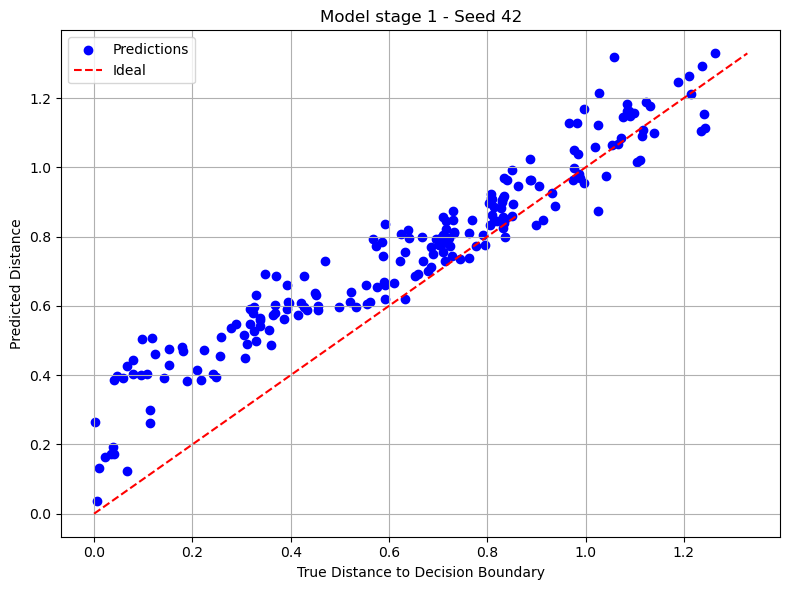

In [23]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_1_1_seed", synthetic_data=X_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.1687 ± 0.0191
Mean RMSE: 0.1976 ± 0.0201


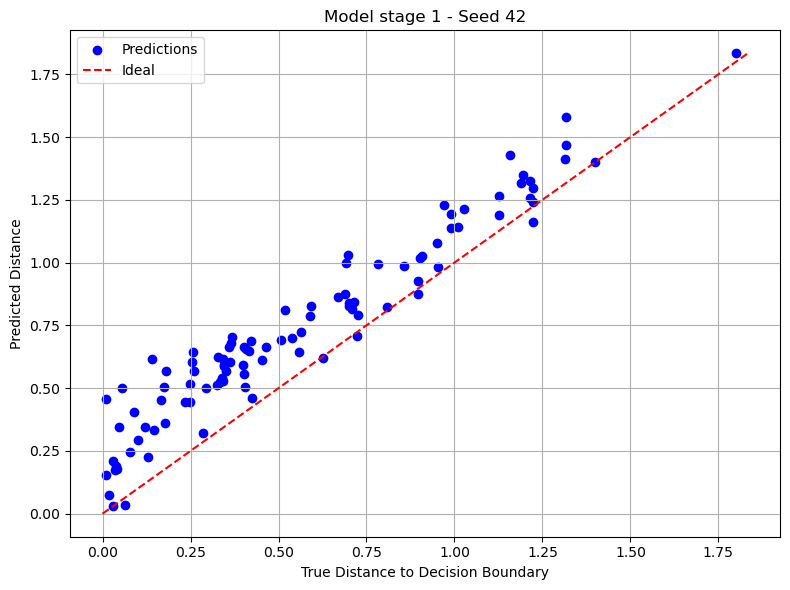

In [24]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_1_1_seed", synthetic_data=Syn_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.1524 ± 0.0314
Mean RMSE: 0.1787 ± 0.0294


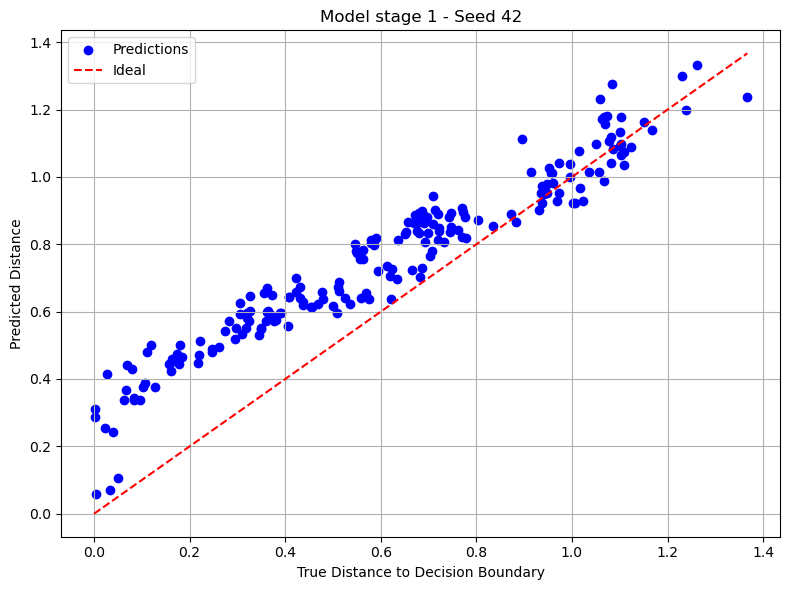

In [25]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_1_2_seed", synthetic_data=X_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.1589 ± 0.0303
Mean RMSE: 0.1825 ± 0.0292


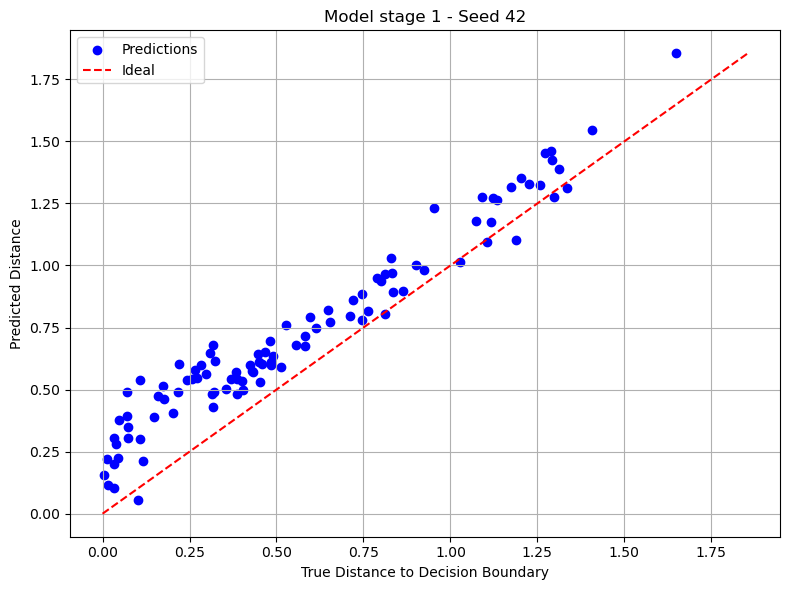

In [26]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_1_2_seed", synthetic_data=Syn_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.1535 ± 0.0313
Mean RMSE: 0.1774 ± 0.0329


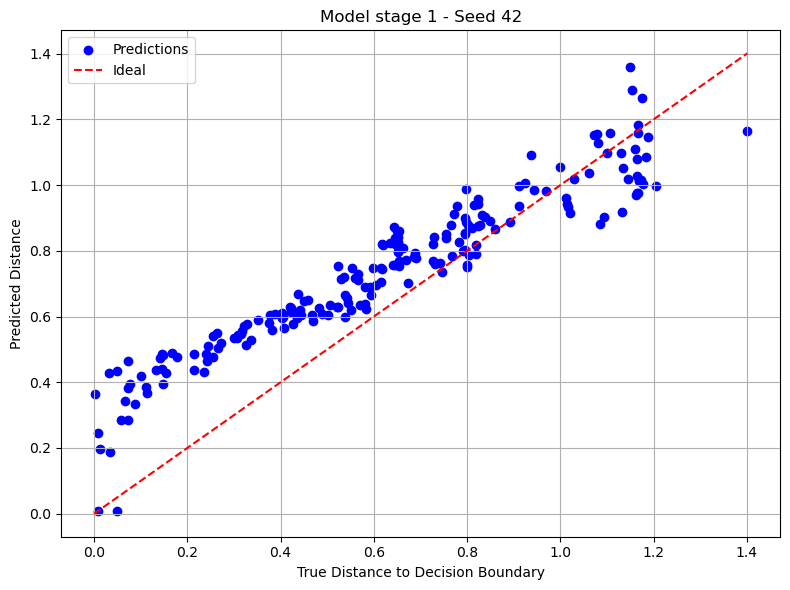

In [27]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_1_3_seed", synthetic_data=X_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.1578 ± 0.0172
Mean RMSE: 0.1848 ± 0.0186


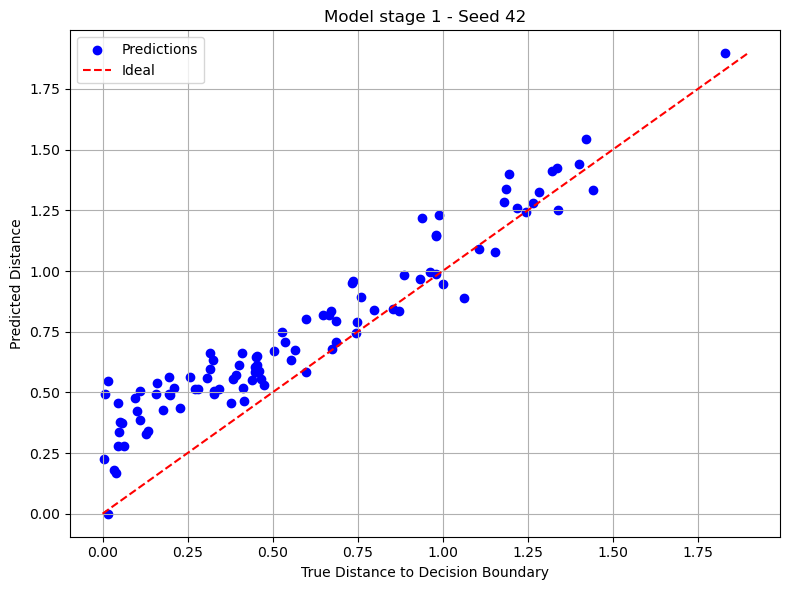

In [28]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_1_3_seed", synthetic_data=Syn_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)

### Black box 2: Gradient Boosting classifier


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.1989 ± 0.0100
Mean RMSE: 0.2497 ± 0.0131


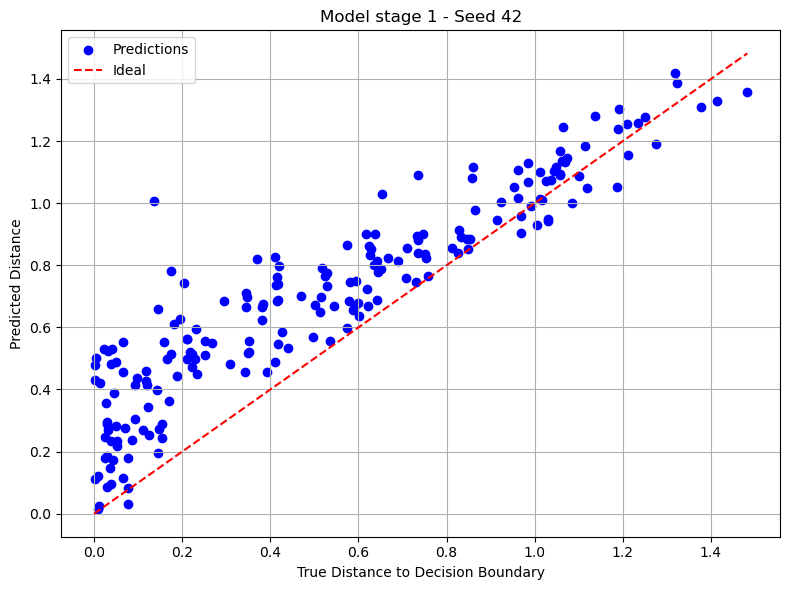

In [29]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_2_1_seed", synthetic_data=X_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.1627 ± 0.0092
Mean RMSE: 0.1933 ± 0.0085


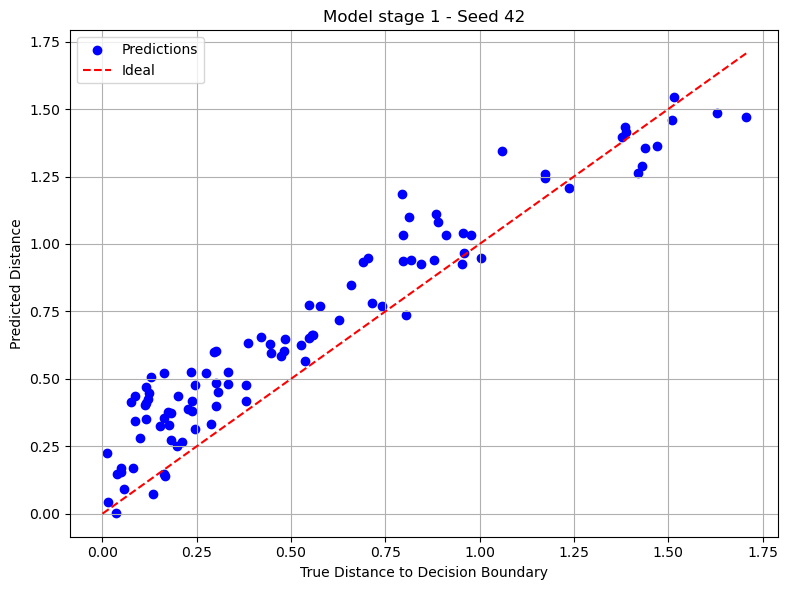

In [30]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_2_1_seed", synthetic_data=Syn_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.2152 ± 0.0038
Mean RMSE: 0.2566 ± 0.0048


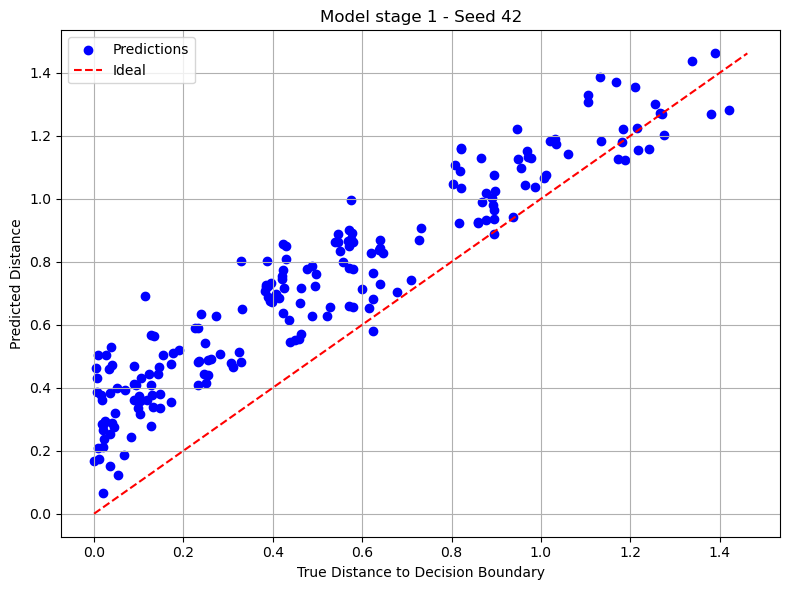

In [31]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_2_2_seed", synthetic_data=X_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.1510 ± 0.0060
Mean RMSE: 0.1776 ± 0.0074


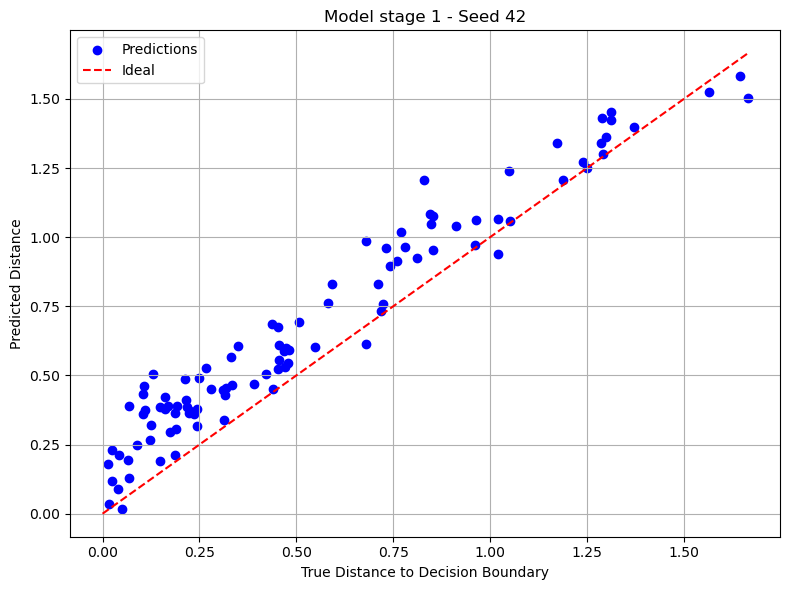

In [32]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_2_2_seed", synthetic_data=Syn_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.2117 ± 0.0217
Mean RMSE: 0.2561 ± 0.0229


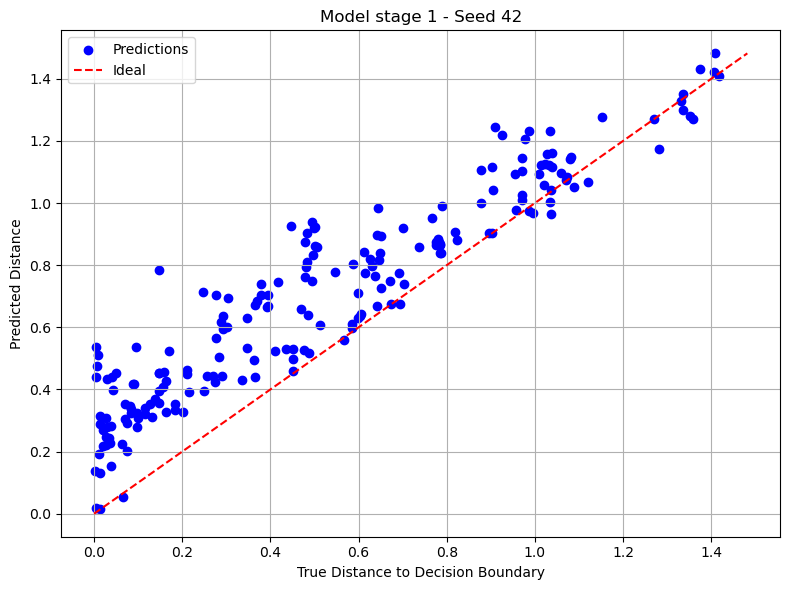

In [33]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_2_3_seed", synthetic_data=X_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.1526 ± 0.0091
Mean RMSE: 0.1809 ± 0.0091


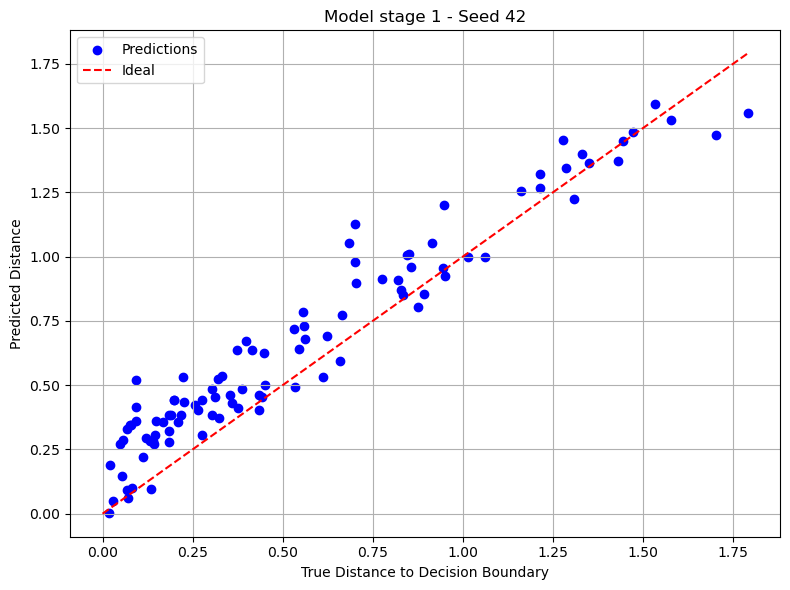

In [34]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_2_3_seed", synthetic_data=Syn_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)

### Black box 3: Neural Network classifier


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.1528 ± 0.0235
Mean RMSE: 0.1712 ± 0.0218


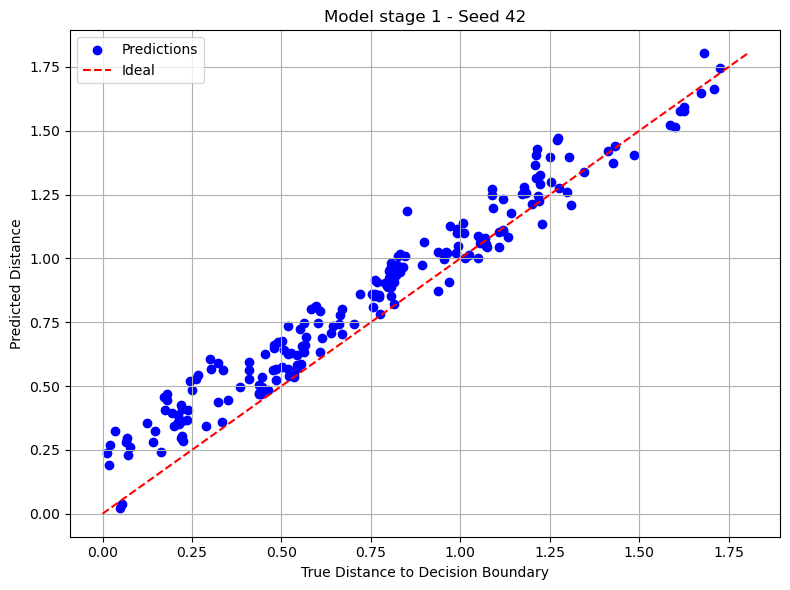

In [35]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_3_1_seed", synthetic_data=X_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.1457 ± 0.0216
Mean RMSE: 0.1637 ± 0.0226


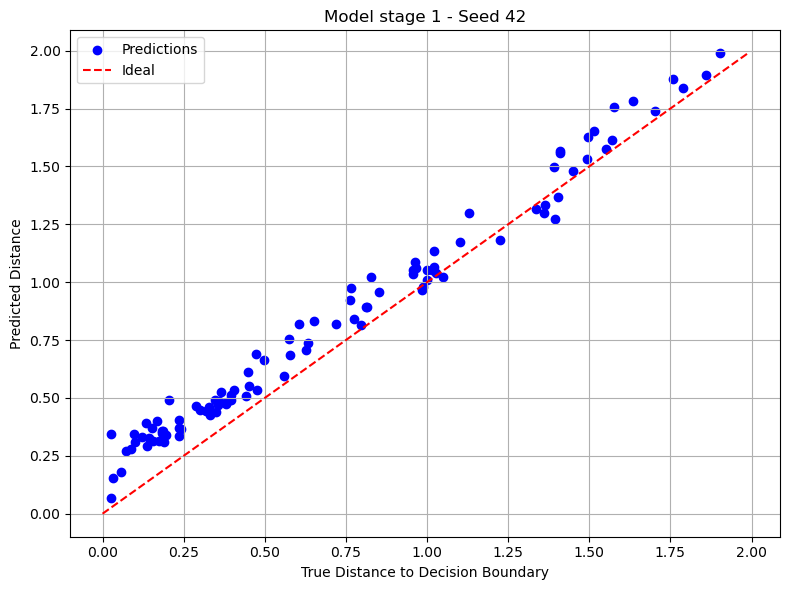

In [36]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_3_1_seed", synthetic_data=Syn_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.1677 ± 0.0200
Mean RMSE: 0.1848 ± 0.0183


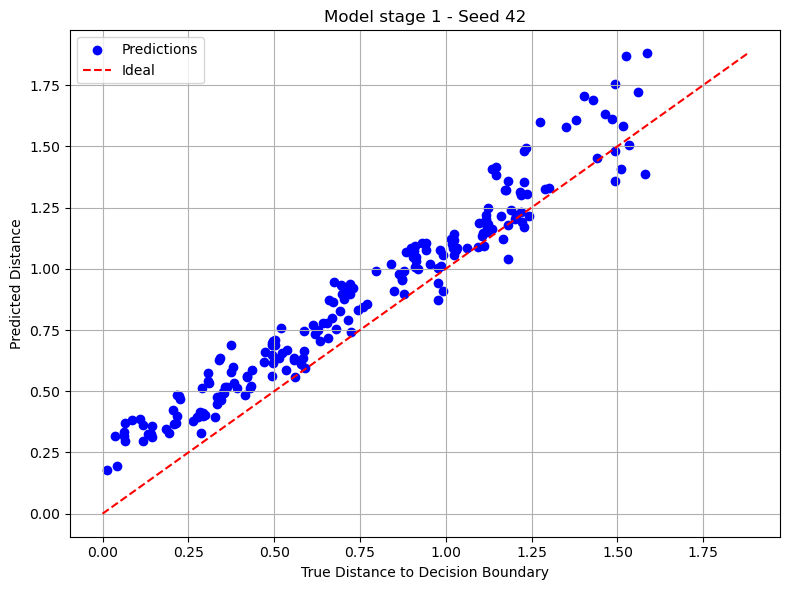

In [37]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_3_2_seed", synthetic_data=X_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.1440 ± 0.0310
Mean RMSE: 0.1602 ± 0.0320


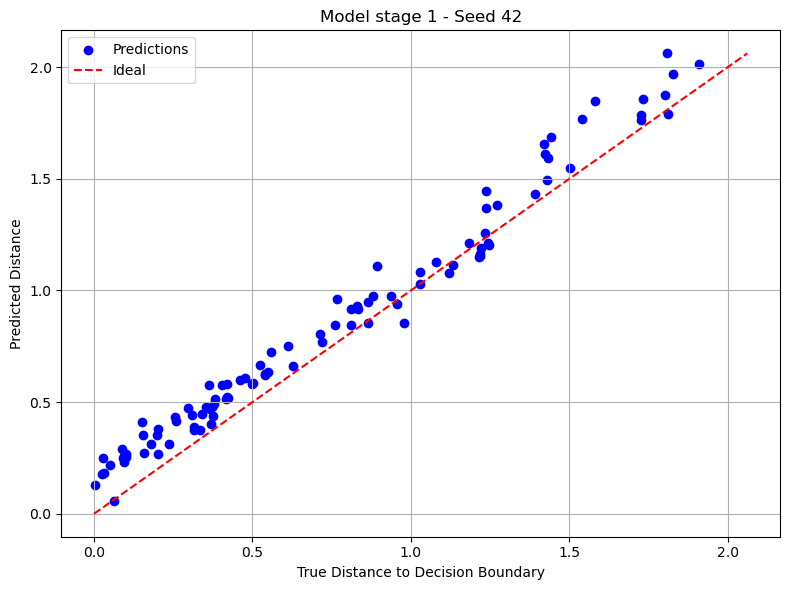

In [38]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_3_2_seed", synthetic_data=Syn_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.1665 ± 0.0281
Mean RMSE: 0.1857 ± 0.0293


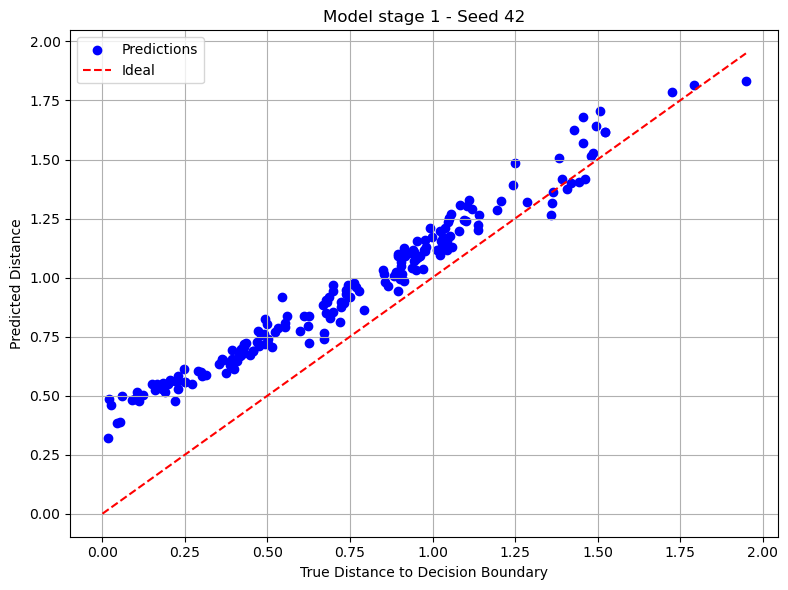

In [39]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_3_3_seed", synthetic_data=X_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.1527 ± 0.0226
Mean RMSE: 0.1710 ± 0.0237


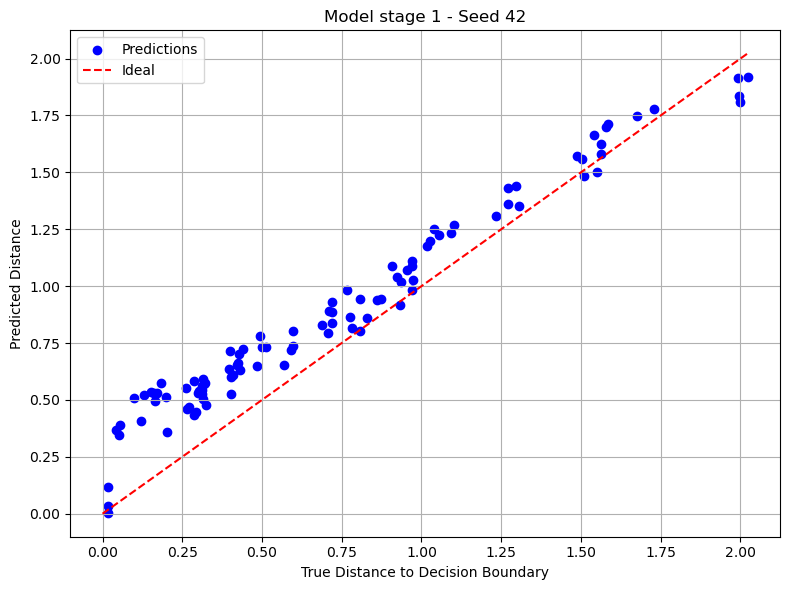

In [40]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_3_3_seed", synthetic_data=Syn_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)

## Connectionist bench (mines vs rocks) dataset

In [41]:
# Import dataset
connectionist_bench_sonar_mines_vs_rocks = fetch_ucirepo(id=151) 

X = connectionist_bench_sonar_mines_vs_rocks.data.features.values 
X = normalize(X) 
y = np.where(connectionist_bench_sonar_mines_vs_rocks.data.targets.values.flatten() == 'M', 1.,0.)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

X_test = X_test[:200]
Syn_test = np.random.uniform(-1,1, (100, 60))

### Black box 1: Random Forest classifier


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.4099 ± 0.0295
Mean RMSE: 0.5473 ± 0.0426


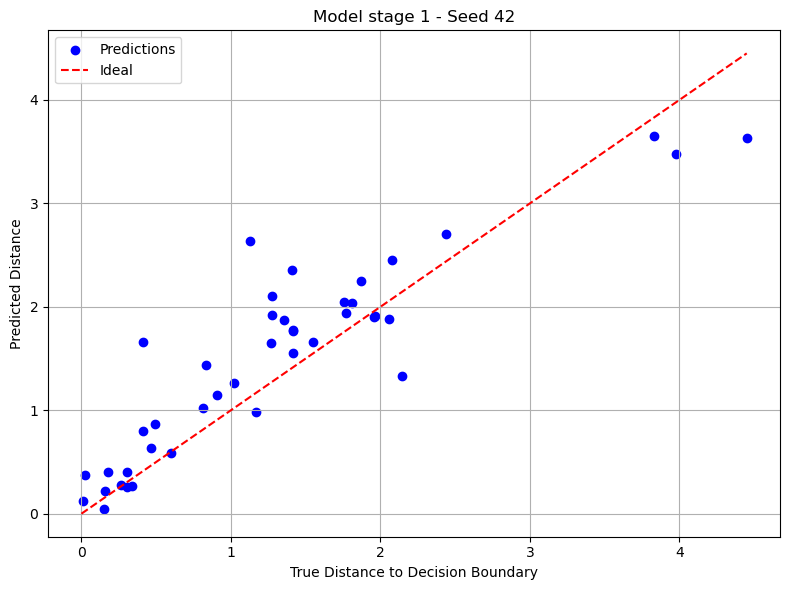

In [42]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_1_1_seed", synthetic_data=X_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.3610 ± 0.0202
Mean RMSE: 0.4643 ± 0.0230


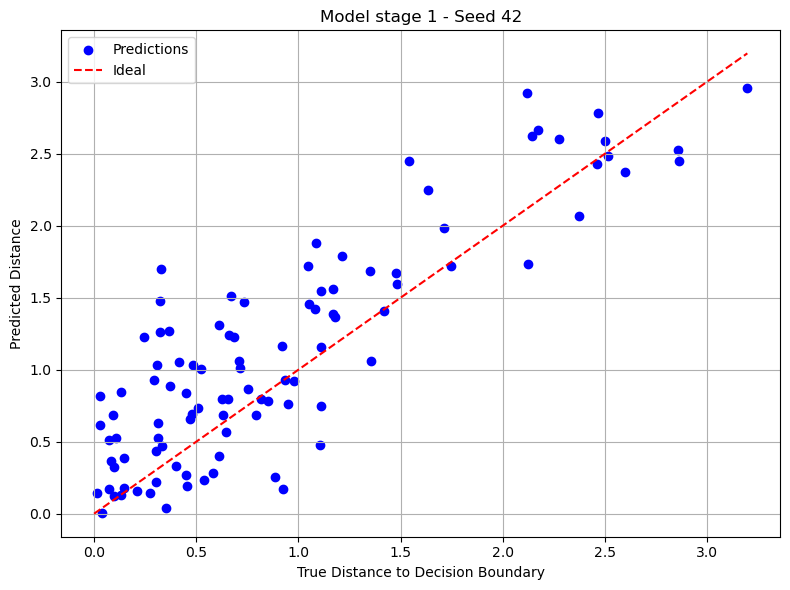

In [43]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_1_1_seed", synthetic_data=Syn_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.3512 ± 0.0249
Mean RMSE: 0.4906 ± 0.0399


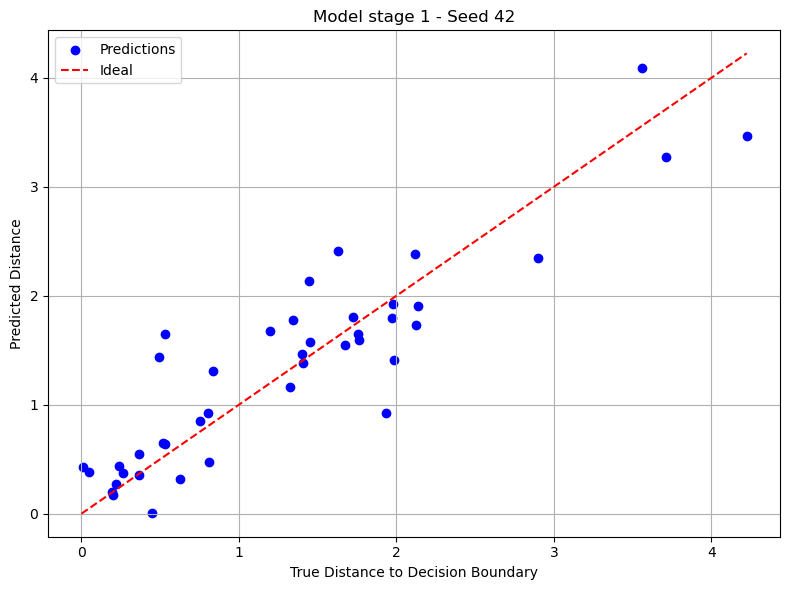

In [44]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_1_2_seed", synthetic_data=X_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.3856 ± 0.0226
Mean RMSE: 0.4910 ± 0.0238


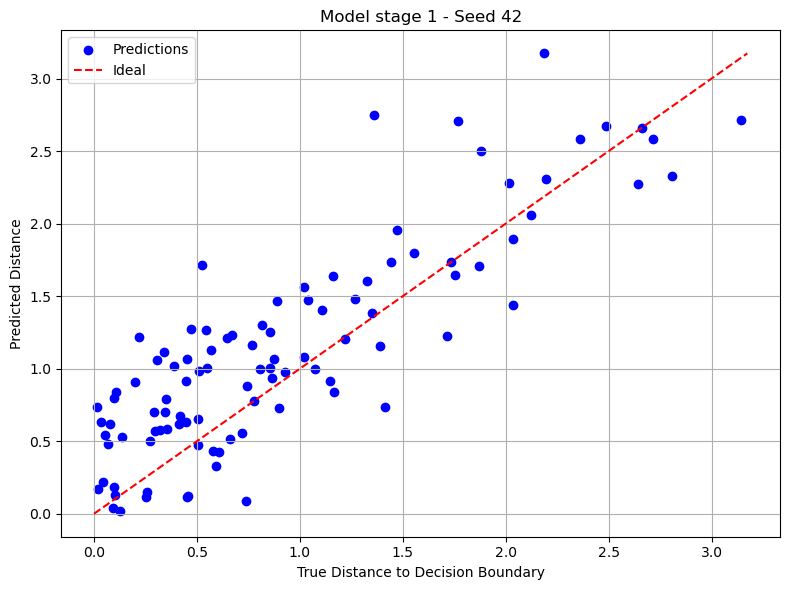

In [45]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_1_2_seed", synthetic_data=Syn_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.4446 ± 0.0430
Mean RMSE: 0.6526 ± 0.0730


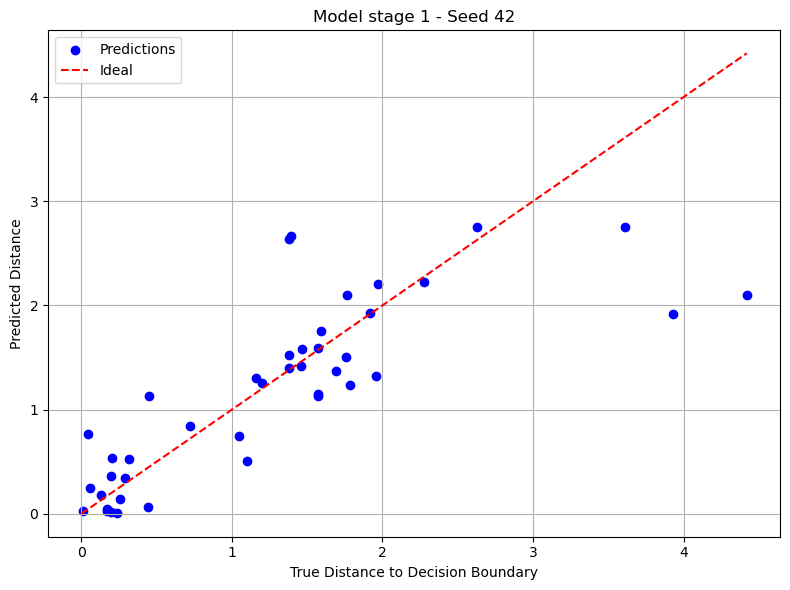

In [46]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_1_3_seed", synthetic_data=X_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.4090 ± 0.0331
Mean RMSE: 0.5224 ± 0.0464


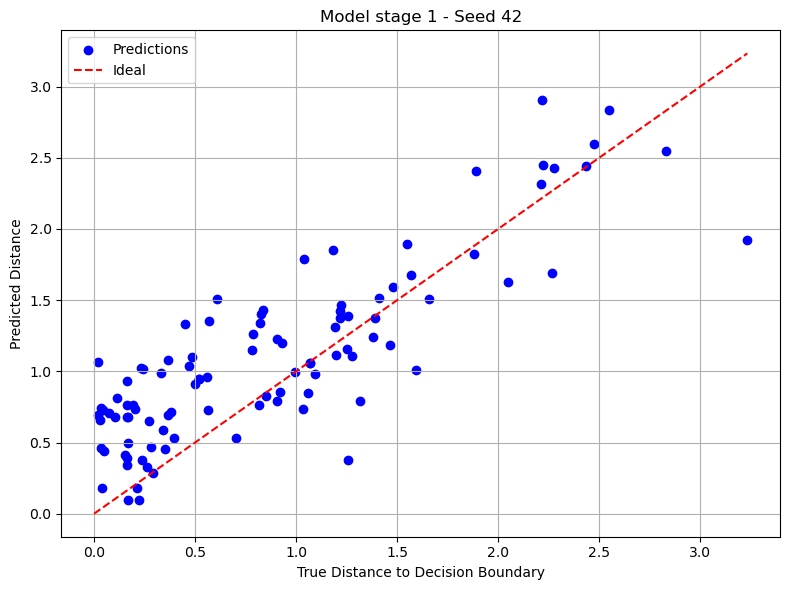

In [47]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_1_3_seed", synthetic_data=Syn_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)

### Black box 2: Gradient Boosting classifier


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.3322 ± 0.0228
Mean RMSE: 0.4251 ± 0.0259


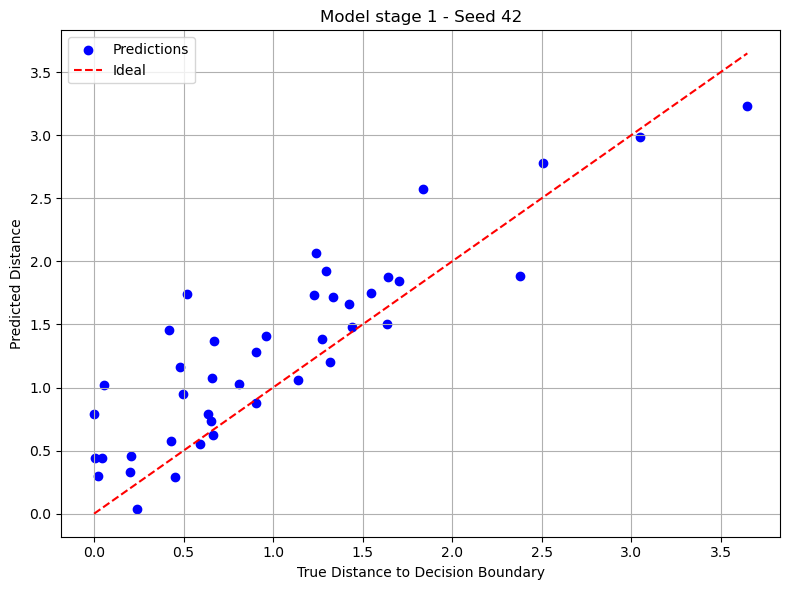

In [48]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_2_1_seed", synthetic_data=X_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.3524 ± 0.0100
Mean RMSE: 0.4342 ± 0.0152


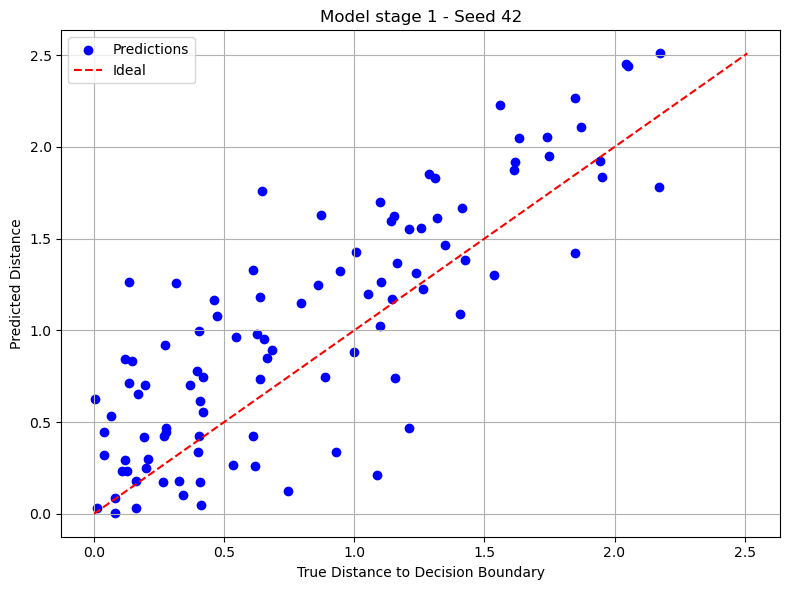

In [49]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_2_1_seed", synthetic_data=Syn_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.3334 ± 0.0435
Mean RMSE: 0.4358 ± 0.0576


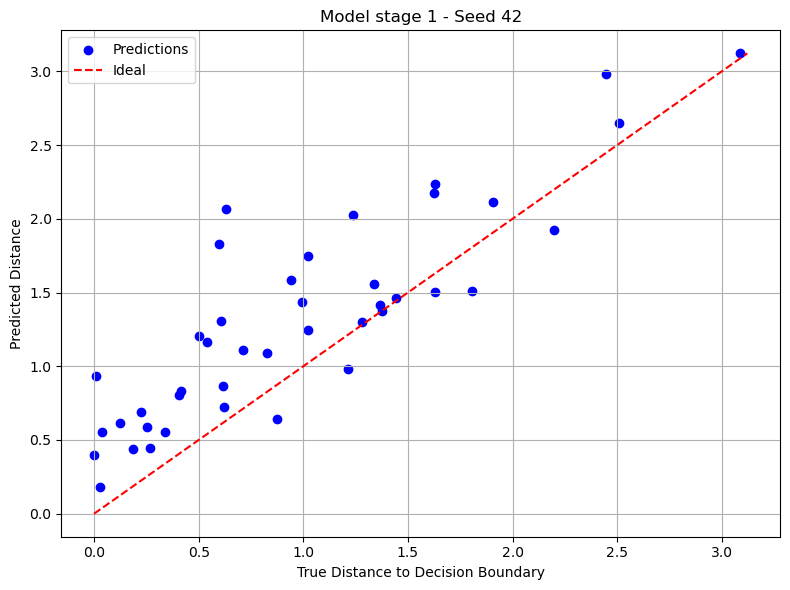

In [50]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_2_2_seed", synthetic_data=X_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.3743 ± 0.0234
Mean RMSE: 0.4636 ± 0.0288


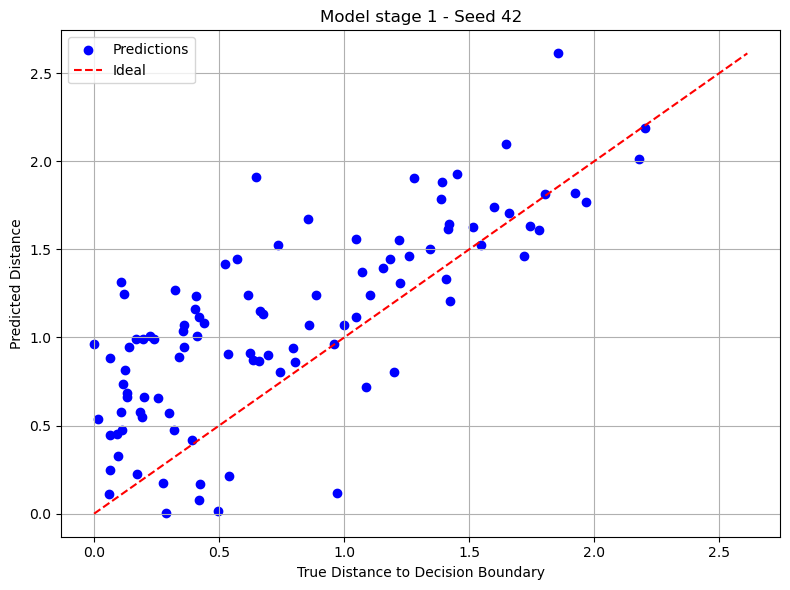

In [51]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_2_2_seed", synthetic_data=Syn_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.3313 ± 0.0259
Mean RMSE: 0.4322 ± 0.0247


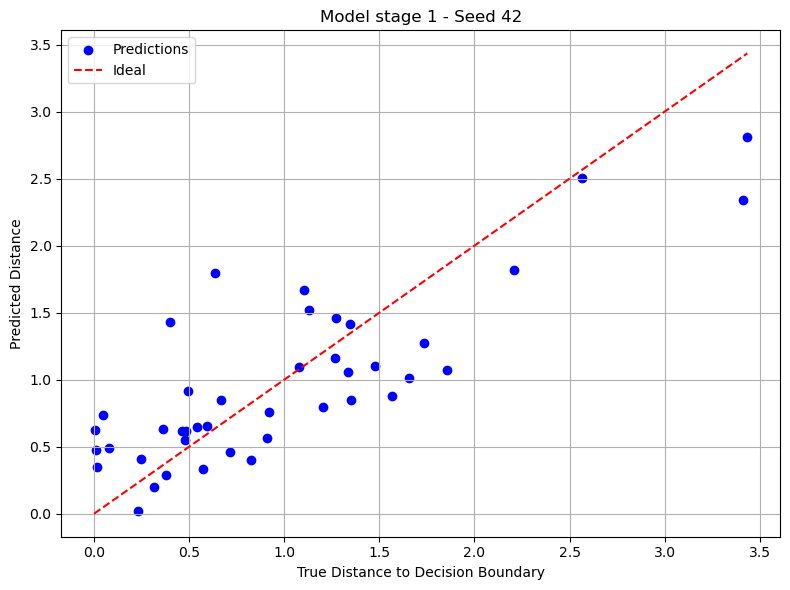

In [52]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_2_3_seed", synthetic_data=X_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.3598 ± 0.0059
Mean RMSE: 0.4596 ± 0.0114


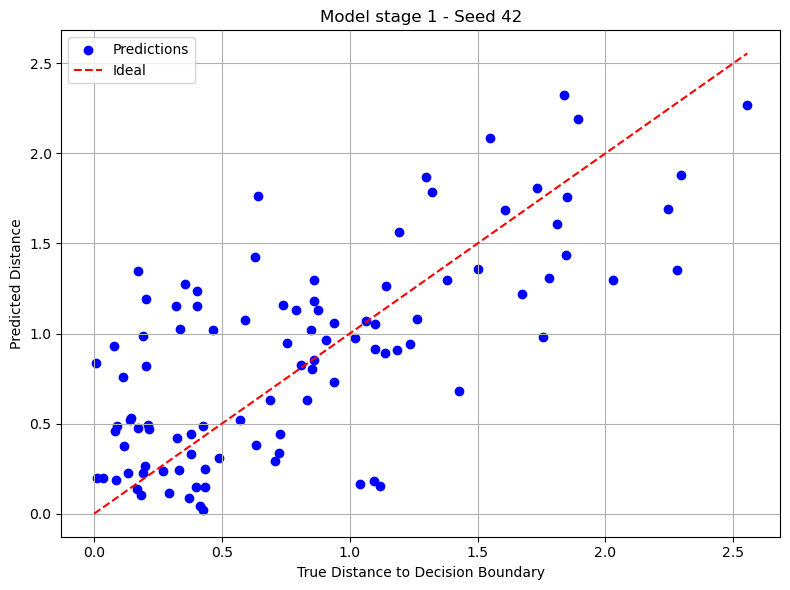

In [53]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_2_3_seed", synthetic_data=Syn_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)

### Black box 3: Neural Network classifier


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.3628 ± 0.0367
Mean RMSE: 0.5235 ± 0.0681


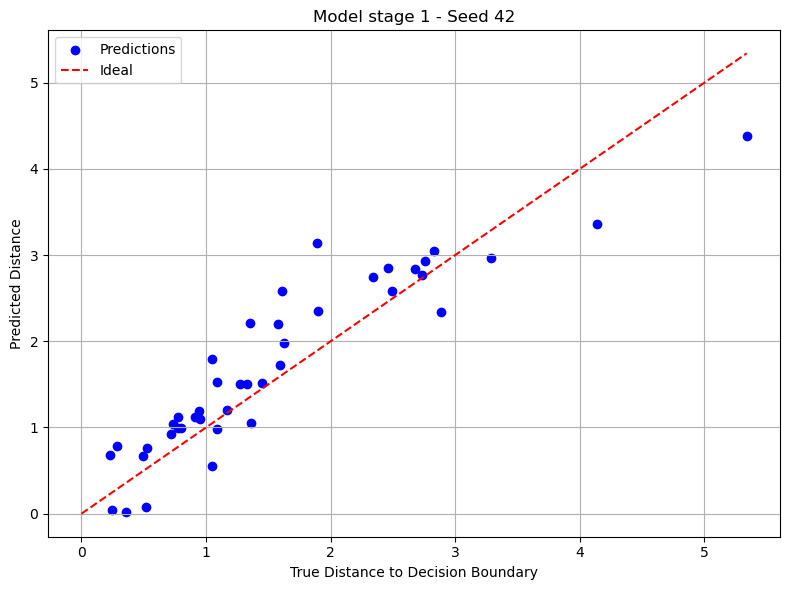

In [54]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_3_1_seed", synthetic_data=X_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.3352 ± 0.0337
Mean RMSE: 0.4775 ± 0.1133


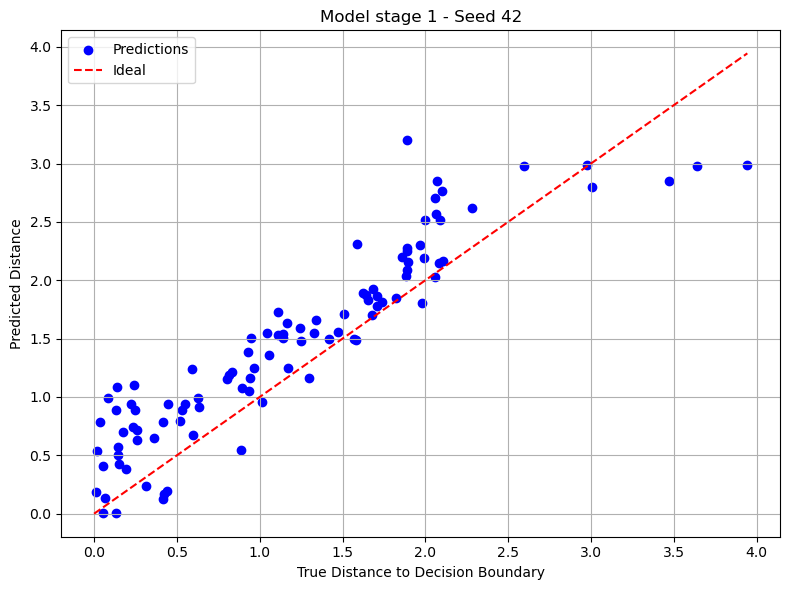

In [55]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_3_1_seed", synthetic_data=Syn_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.3598 ± 0.0318
Mean RMSE: 0.5721 ± 0.1086


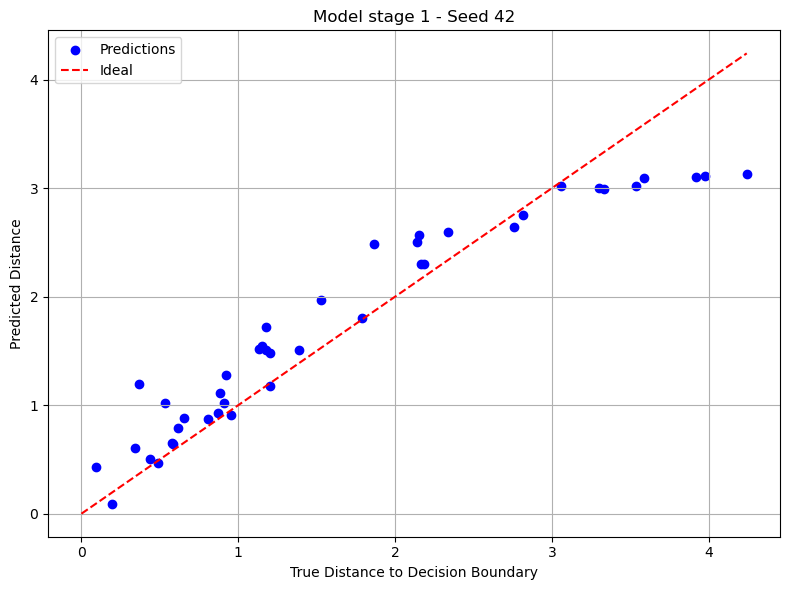

In [56]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_3_2_seed", synthetic_data=X_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.2877 ± 0.0177
Mean RMSE: 0.3627 ± 0.0227


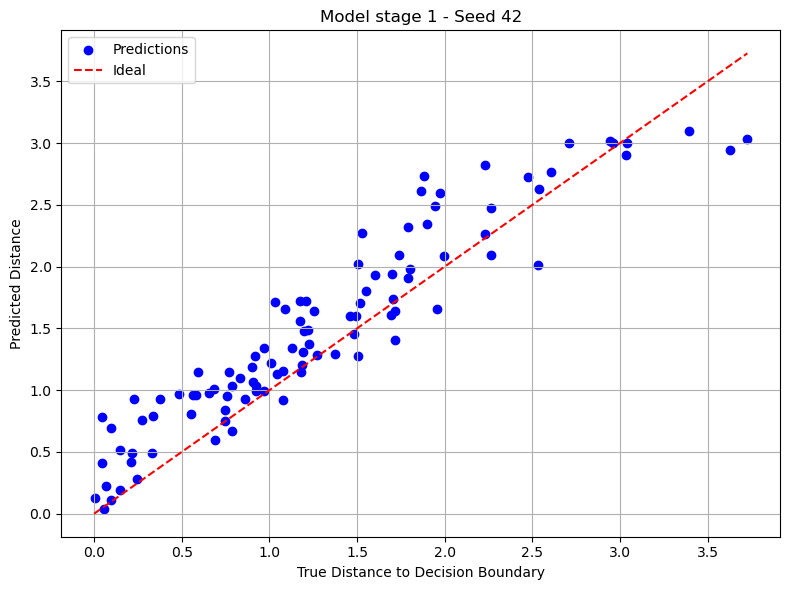

In [57]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_3_2_seed", synthetic_data=Syn_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.3378 ± 0.0294
Mean RMSE: 0.5519 ± 0.0879


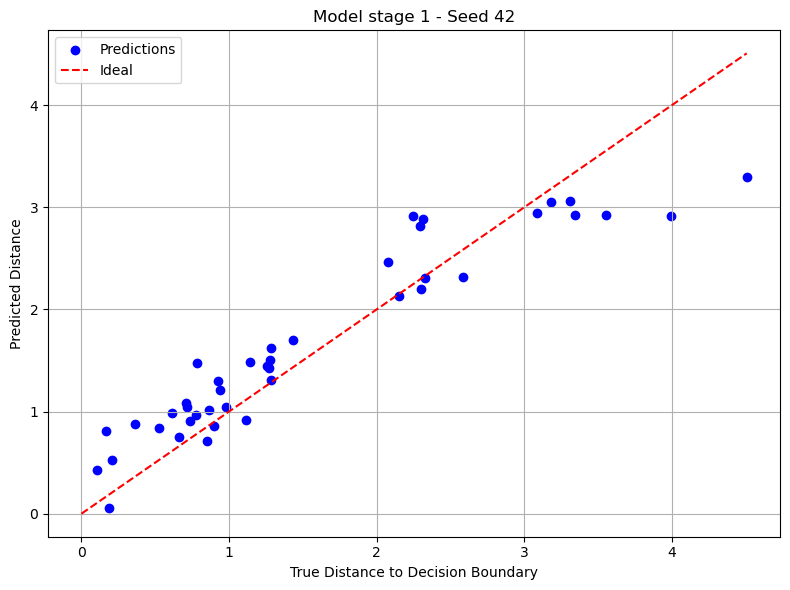

In [58]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_3_3_seed", synthetic_data=X_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 1
Mean MAE : 0.3240 ± 0.0196
Mean RMSE: 0.4347 ± 0.0665


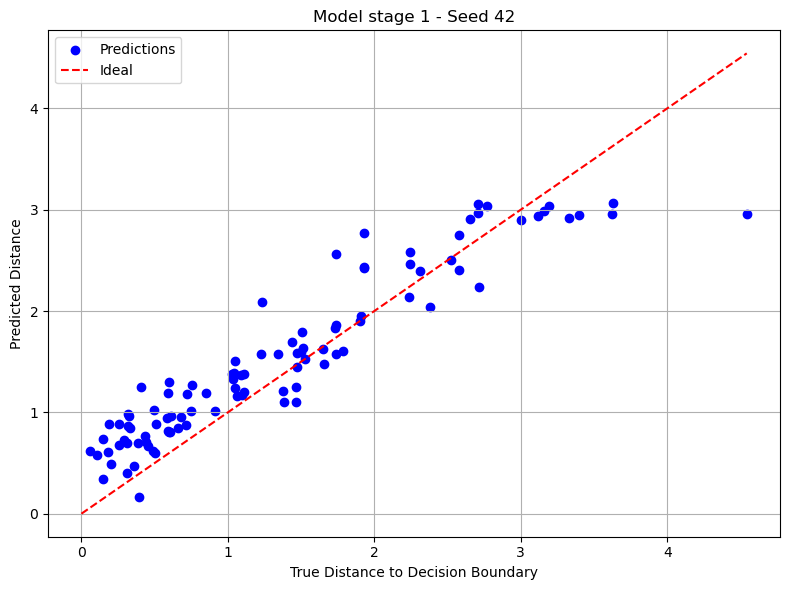

In [59]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_3_3_seed", synthetic_data=Syn_test, 
                             model_stage=1, num_rdc_samples=10_000, seed_plot_index=42)